# Final Proposal: How Does Hand-checking Rule Affects an NBA Player's Scoring Ability?

#### Principle Investigator: Jarred Go <br> Email: jsg570@nyu.edu

At the start of the 2004-2005 season, the NBA introduced a hand-checking penalty that prevents a defender from using his hands to impede the progress of the scoring player. Many older generation players have attributed this brand new rule as one of the changes that has affected the physicality of the game. They claim that it is much easier to score in today's NBA than it was in the past. This project will the study the affect of the hand-checking rule on players that meet a certain criteria. To make sure the sample each year stays relatively consistent, I will be looking at players between the ages of 21 to 35, to eliminate the first few and last few years of their career (which tends to be on the lower scoring spectrum). I would like to see the effect on their average scoring six years before and after the hand-checking rule was implemented. Furthermore, I would like to see if the Hand-checking rule had a greater effect on the top 30 scoring players in the sample versus the rest of the sample.

The key element of this project is the use of this [dataset](https://www.kaggle.com/drgilermo/nba-players-stats/version/2#Seasons_Stats.csv) that provides each player's statistics (points, field goal percentage) for a given NBA season.

This project is likely to have four sections.

- The dataset will be cleaned up to only include players who are within the ages of 21 to 35 in a given season for the years 1998 to 2011. Each season, their points will be averaged to show the change in scoring patterns.


- The second part will show a visualization of the players' scoring averages plotted against the season on the x-axis. Another line will also be drawn to show the effect on the top 30 scoring players in the sample.


- The project will also visualize the effect on a players field goal percentage as the rule was implemented.


- I would also like to plot a graph based on key players (some of the 2004 NBA all-stars) to see the effect on their scoring ability

## Data Report

**Overview:** The data for the my project comes from the data set I mentioned earlier. This dataset was extracted from [Basketball Reference](https://www.basketball-reference.com/). It includes all the counted statistics for each player that has played in a particular season.

**Important Varaibles**

- Points Per Game (PPG): This is defined as the average points a player scores per game for a given season


- Field Goal Percentage (FG%): Measure the number of shots a player makes versus the number of attempts a player makes


- True Shooting Percentage (TS%): This measures a player's efficiency in scoring the ball. This is defined as PTS/(2*(FGA+(0.44*FTA)))*100

In order to get all the ages of the players, I also downloaded a dataset which includes the birth date of all NBA players. This would allow me to get the sample of players between the ages of 21 to 35 in a particular season. The idea is that on average as a player leaves his prime, another player will take his spot, keeping the sample relatively consistent.

**Requisite Packages** Below I bring in the packages I need...

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

**Grabing the Data:** I have uploaded the relevant data sets to my github for ease of access. In particular two data sets will be necessary for this project. The first are the season stats, while the second are the player information.

In [2]:
season_df = pd.read_csv("https://raw.githubusercontent.com/jsg570/Final-Project/master/Seasons_Stats.csv")
season_df.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [3]:
players_df = pd.read_csv("https://raw.githubusercontent.com/jsg570/Final-Project/master/player_data.csv")
players_df.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [4]:
start_date = 1998
end_date = 2011
season_df_2 = season_df.set_index("Year").loc[list(range(start_date,end_date + 1))] #We only need the data for the years 1999-2010
season_df_2.head()

,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Year,,,,,,,,,,,,,,,,,,,,,
1998.0,13414,Mahmoud Abdul-Rauf,PG,28.0,SAC,31.0,0.0,530.0,10.5,0.405,...,1.000,6.0,31.0,37.0,58.0,16.0,1.0,19.0,31.0,227.0
1998.0,13415,Tariq Abdul-Wahad,SG,23.0,SAC,59.0,16.0,959.0,10.1,0.456,...,0.672,44.0,72.0,116.0,51.0,35.0,13.0,65.0,81.0,376.0
1998.0,13416,Shareef Abdur-Rahim,SF,21.0,VAN,82.0,82.0,2950.0,21.1,0.562,...,0.784,227.0,354.0,581.0,213.0,89.0,76.0,257.0,201.0,1829.0
1998.0,13417,Cory Alexander,PG,24.0,TOT,60.0,22.0,1298.0,15.2,0.548,...,0.784,17.0,129.0,146.0,209.0,70.0,11.0,112.0,98.0,488.0
1998.0,13418,Cory Alexander,PG,24.0,SAS,37.0,3.0,501.0,11.1,0.512,...,0.676,7.0,40.0,47.0,71.0,25.0,5.0,47.0,53.0,165.0


In [5]:
#Cleaning Up Data
#The season_df data set has players with * in the their name, we need to remove this
season_df_2.Player = season_df_2.Player.str.replace("*","") 
#The season_df data set only had the first two names of a player (ex. Vinny Del instead of Vinny Del Negro).
#We need to change the player_df data set to match this format
players_df.name = players_df.name.str.rsplit().str[0] + " " + players_df.name.str.rsplit().str[1]

In [6]:
player_year = players_df.birth_date.str.split().str[-1] 
players_df["birth_year"] = player_year #Create a new column that only includes the birth year
players_df.birth_year = players_df.birth_year.astype(float)
players_df.head()

,name,year_start,year_end,position,height,weight,birth_date,college,birth_year
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University,1968.0
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University,1946.0
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles",1947.0
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University,1969.0
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University,1974.0


In [7]:
#A for loop that uses the birth year of a player from the player_df and adds it to the season_df
birth_date_list = []
name_list = []
for i in season_df_2["Unnamed: 0"]:
    name = season_df_2.set_index("Unnamed: 0").loc[i, "Player"]
    try: 
        #incase there are two players with the same player, we probably want the younger player
        birth_year = players_df.set_index("name").loc[name,"birth_year"].iloc[-1]
    except:
        birth_year = players_df.set_index("name").loc[name,"birth_year"]
    birth_date_list += [birth_year]

In [8]:
season_df_2["BirthYear"] = birth_date_list
season_df_2.BirthYear = season_df_2.BirthYear.astype(float)
season_df_2.head()

,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,BirthYear
Year,,,,,,,,,,,,,,,,,,,,,
1998.0,13414,Mahmoud Abdul-Rauf,PG,28.0,SAC,31.0,0.0,530.0,10.5,0.405,...,6.0,31.0,37.0,58.0,16.0,1.0,19.0,31.0,227.0,1969.0
1998.0,13415,Tariq Abdul-Wahad,SG,23.0,SAC,59.0,16.0,959.0,10.1,0.456,...,44.0,72.0,116.0,51.0,35.0,13.0,65.0,81.0,376.0,1974.0
1998.0,13416,Shareef Abdur-Rahim,SF,21.0,VAN,82.0,82.0,2950.0,21.1,0.562,...,227.0,354.0,581.0,213.0,89.0,76.0,257.0,201.0,1829.0,1976.0
1998.0,13417,Cory Alexander,PG,24.0,TOT,60.0,22.0,1298.0,15.2,0.548,...,17.0,129.0,146.0,209.0,70.0,11.0,112.0,98.0,488.0,1973.0
1998.0,13418,Cory Alexander,PG,24.0,SAS,37.0,3.0,501.0,11.1,0.512,...,7.0,40.0,47.0,71.0,25.0,5.0,47.0,53.0,165.0,1973.0


In [9]:
#Using the Birth Year and Season Year to get the player's age
season_df_2.reset_index(inplace = True)
season_df_2["Age"] = season_df_2["Year"] - season_df_2["BirthYear"]

In [10]:
age_start = 21
age_end = 35
season_df_2 = season_df_2.set_index("Age").loc[list(range(age_start,age_end + 1,1))] #all players between 21-35
season_df_2.head()

,Year,Unnamed: 0,Player,Pos,Tm,G,GS,MP,PER,TS%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,BirthYear
Age,,,,,,,,,,,,,,,,,,,,,
21.0,1998.0,13692,Stephon Marbury,PG,MIN,82.0,81.0,3112.0,16.3,0.505,...,58.0,172.0,230.0,704.0,104.0,7.0,256.0,222.0,1450.0,1977.0
21.0,1998.0,13716,Marko Milic,SF,PHO,33.0,0.0,163.0,18.4,0.644,...,10.0,15.0,25.0,12.0,10.0,0.0,21.0,17.0,92.0,1977.0
21.0,1998.0,13889,Tim Thomas,SF,PHI,77.0,48.0,1779.0,14.9,0.538,...,107.0,181.0,288.0,90.0,54.0,17.0,118.0,185.0,845.0,1977.0
21.0,1999.0,13995,Corey Benjamin,PG,CHI,31.0,1.0,320.0,8.3,0.438,...,15.0,25.0,40.0,10.0,11.0,8.0,21.0,46.0,118.0,1978.0
21.0,1999.0,13998,Mike Bibby,PG,VAN,50.0,50.0,1758.0,14.8,0.487,...,30.0,106.0,136.0,325.0,78.0,5.0,146.0,122.0,662.0,1978.0


In [11]:
#Create a df with the stats we need
season_df_2 = season_df_2[["Year", "Player", "G", "PTS", "TS%", "FG%"]]
season_df_2.reset_index(inplace = True)
season_df_2.head()

,Age,Year,Player,G,PTS,TS%,FG%
0,21.0,1998.0,Stephon Marbury,82.0,1450.0,0.505,0.415
1,21.0,1998.0,Marko Milic,33.0,92.0,0.644,0.609
2,21.0,1998.0,Tim Thomas,77.0,845.0,0.538,0.447
3,21.0,1999.0,Corey Benjamin,31.0,118.0,0.438,0.376
4,21.0,1999.0,Mike Bibby,50.0,662.0,0.487,0.430


In [12]:
#Calculate Points per Game
season_df_2["PPG"] = season_df_2["PTS"] / season_df_2["G"]
season_df_2.head(10)

,Age,Year,Player,G,PTS,TS%,FG%,PPG
0,21.0,1998.0,Stephon Marbury,82.0,1450.0,0.505,0.415,17.682927
1,21.0,1998.0,Marko Milic,33.0,92.0,0.644,0.609,2.787879
2,21.0,1998.0,Tim Thomas,77.0,845.0,0.538,0.447,10.974026
3,21.0,1999.0,Corey Benjamin,31.0,118.0,0.438,0.376,3.806452
4,21.0,1999.0,Mike Bibby,50.0,662.0,0.487,0.430,13.240000
5,21.0,1999.0,Kobe Bryant,50.0,996.0,0.549,0.465,19.920000
6,21.0,1999.0,Dirk Nowitzki,47.0,385.0,0.491,0.405,8.191489
7,21.0,1999.0,Jermaine O'Neal,36.0,90.0,0.457,0.434,2.500000
8,21.0,1999.0,Korleone Young,3.0,13.0,0.597,0.500,4.333333
9,21.0,2000.0,William Avery,59.0,154.0,0.391,0.309,2.610169


In [13]:
#Having "%" in the column names makes it difficult later on. Let's remove this.
new_name_list = []

for var in season_df_2.columns:
    new_name_list.append(var.rsplit(maxsplit=1)[0].replace("%",""))
    
season_df_2.columns = new_name_list

season_df_2.head()

,Age,Year,Player,G,PTS,TS,FG,PPG
0,21.0,1998.0,Stephon Marbury,82.0,1450.0,0.505,0.415,17.682927
1,21.0,1998.0,Marko Milic,33.0,92.0,0.644,0.609,2.787879
2,21.0,1998.0,Tim Thomas,77.0,845.0,0.538,0.447,10.974026
3,21.0,1999.0,Corey Benjamin,31.0,118.0,0.438,0.376,3.806452
4,21.0,1999.0,Mike Bibby,50.0,662.0,0.487,0.430,13.240000


In [14]:
#Create a DataFrame of the average PPG for the top 30 scorers between the age of 21 and 35
average_list = []
year_list = []
for year in range(start_date,end_date + 1):
    temp_df = season_df_2.set_index("Year").loc[year]
    temp_df = temp_df.reset_index()
    
    #Incase the player was traded, the data set reports total stats alongside the stats for each team the player has played in
    #I only want the total stats, so I deleted the duplicates
    name_list = []
    drop_list = []
    for index, row in temp_df.iterrows():
        if row["Player"] not in name_list:
            name_list += [row["Player"]]
        else:
            drop_list += [index]
    temp_df = temp_df.drop(drop_list, axis = 0)
    
    temp_df.sort_values(by = ["PPG"], ascending = False, inplace = True)
    average = temp_df.PPG.iloc[0:31].mean()
    year_list += [year]
    average_list += [average]
    
top = {'Year': year_list, "Top_Average_PPG": average_list}
top_df = pd.DataFrame(top)
top_df.head()

,Year,Top_Average_PPG
0,1998,20.792934
1,1999,19.448442
2,2000,21.236497
3,2001,22.581150
4,2002,22.051325


In [15]:
#Create a DataFrame of the average PPG for the remaining scorers between the age of 21 and 35
average_list = []
year_list = []
for year in range(start_date,end_date + 1):
    temp_df = season_df_2.set_index("Year").loc[year]
    temp_df = temp_df.reset_index()
    
    #Incase the player was traded, the data set reports total stats alongside the stats for each team the player has played in
    #I only want the total stats, so I deleted the duplicates
    name_list = []
    drop_list = []
    for index, row in temp_df.iterrows():
        if row["Player"] not in name_list:
            name_list += [row["Player"]]
        else:
            drop_list += [index]
    temp_df = temp_df.drop(drop_list, axis = 0)
    
    temp_df.sort_values(by = ["PPG"], ascending = False, inplace = True)
    average = temp_df.PPG.iloc[31:].mean()
    year_list += [year]
    average_list += [average]
    
rest = {'Year': year_list, "Rest_Average_PPG": average_list}
rest_df = pd.DataFrame(rest)
rest_df.head()

,Year,Rest_Average_PPG
0,1998,6.784464
1,1999,6.177890
2,2000,6.883708
3,2001,6.556729
4,2002,6.811702


In [16]:
#Create a DataFrame of the average PPG for the all scorers between the age of 21 and 35
average_list = []
year_list = []
for year in range(start_date,end_date + 1):
    temp_df = season_df_2.set_index("Year").loc[year]
    temp_df = temp_df.reset_index()
    
    #Incase the player was traded, the data set reports total stats alongside the stats for each team the player has played in
    #I only want the total stats, so I deleted the duplicates
    name_list = []
    drop_list = []
    for index, row in temp_df.iterrows():
        if row["Player"] not in name_list:
            name_list += [row["Player"]]
        else:
            drop_list += [index]
    temp_df = temp_df.drop(drop_list, axis = 0)
    
    temp_df.sort_values(by = ["PPG"], ascending = False, inplace = True)
    average = temp_df.PPG.mean()
    year_list += [year]
    average_list += [average]
all = {'Year': year_list, "All_Average_PPG": average_list}
all_df = pd.DataFrame(all)
all_df.head()

,Year,All_Average_PPG
0,1998,7.854076
1,1999,7.227347
2,2000,8.010129
3,2001,7.820742
4,2002,8.016877


In [17]:
combo = pd.merge(top_df, rest_df,
                 how = "left",
                 on = "Year"
                )

combo = pd.merge(combo, all_df,
                 how = "left",
                 on = "Year"
                )

combo.set_index("Year", inplace = True)
combo

,Top_Average_PPG,Rest_Average_PPG,All_Average_PPG
Year,,,
1998,20.792934,6.784464,7.854076
1999,19.448442,6.177890,7.227347
2000,21.236497,6.883708,8.010129
2001,22.581150,6.556729,7.820742
2002,22.051325,6.811702,8.016877
2003,22.221386,6.675461,7.901730
2004,21.119456,6.734775,7.844041
2005,22.932126,7.200701,8.367386
2006,23.579053,7.006138,8.214986


In [18]:
#Create a DataFrame of the TS% for the top 30 scorers between the age of 21 and 35
average_list = []
year_list = []
for year in range(start_date,end_date + 1):
    temp_df = season_df_2.set_index("Year").loc[year]
    temp_df = temp_df.reset_index()
    
    #Incase the player was traded, the data set reports total stats alongside the stats for each team the player has played in
    #I only want the total stats, so I deleted the duplicates
    name_list = []
    drop_list = []
    for index, row in temp_df.iterrows():
        if row["Player"] not in name_list:
            name_list += [row["Player"]]
        else:
            drop_list += [index]
    temp_df = temp_df.drop(drop_list, axis = 0)
    
    temp_df.sort_values(by = ["PPG"], ascending = False, inplace = True)
    average = temp_df.TS.iloc[0:31].mean()
    year_list += [year]
    average_list += [average]
    
top_TS = {'Year': year_list, "Top_TS": average_list}
top_TS_df = pd.DataFrame(top_TS)

In [19]:
#Create a DataFrame of the TS% for the remaining scorers between the age of 21 and 35
average_list = []
year_list = []
for year in range(start_date,end_date + 1):
    temp_df = season_df_2.set_index("Year").loc[year]
    temp_df = temp_df.reset_index()
    
    #Incase the player was traded, the data set reports total stats alongside the stats for each team the player has played in
    #I only want the total stats, so I deleted the duplicates
    name_list = []
    drop_list = []
    for index, row in temp_df.iterrows():
        if row["Player"] not in name_list:
            name_list += [row["Player"]]
        else:
            drop_list += [index]
    temp_df = temp_df.drop(drop_list, axis = 0)
    
    temp_df.sort_values(by = ["PPG"], ascending = False, inplace = True)
    average = temp_df.TS.iloc[31:].mean()
    year_list += [year]
    average_list += [average]
    
rest_TS = {'Year': year_list, "Rest_TS": average_list}
rest_TS_df = pd.DataFrame(rest_TS)

In [20]:
#Create a DataFrame of the TS% for the all scorers between the age of 21 and 35
average_list = []
year_list = []
for year in range(start_date,end_date + 1):
    temp_df = season_df_2.set_index("Year").loc[year]
    temp_df = temp_df.reset_index()
    
    #Incase the player was traded, the data set reports total stats alongside the stats for each team the player has played in
    #I only want the total stats, so I deleted the duplicates
    name_list = []
    drop_list = []
    for index, row in temp_df.iterrows():
        if row["Player"] not in name_list:
            name_list += [row["Player"]]
        else:
            drop_list += [index]
    temp_df = temp_df.drop(drop_list, axis = 0)
    
    temp_df.sort_values(by = ["PPG"], ascending = False, inplace = True)
    average = temp_df.TS.mean()
    year_list += [year]
    average_list += [average]
all_TS = {'Year': year_list, "All_TS": average_list}
all_TS_df = pd.DataFrame(all_TS)

In [21]:
combo_TS = pd.merge(top_TS_df, rest_TS_df,
                 how = "left",
                 on = "Year"
                )

combo_TS = pd.merge(combo_TS, all_TS_df,
                 how = "left",
                 on = "Year"
                )

combo_TS.set_index("Year", inplace = True)
combo_TS

,Top_TS,Rest_TS,All_TS
Year,,,
1998,0.538710,0.493059,0.496562
1999,0.525613,0.480006,0.483631
2000,0.541387,0.492554,0.496396
2001,0.537935,0.485097,0.489286
2002,0.538194,0.491008,0.494749
2003,0.539742,0.481939,0.486510
2004,0.531419,0.485108,0.488688
2005,0.551548,0.498842,0.502751
2006,0.562387,0.507191,0.511236


In [22]:
#Create a DataFrame of the FG% for the top 30 scorers between the age of 21 and 35
average_list = []
year_list = []
for year in range(start_date,end_date + 1):
    temp_df = season_df_2.set_index("Year").loc[year]
    temp_df = temp_df.reset_index()
    
    #Incase the player was traded, the data set reports total stats alongside the stats for each team the player has played in
    #I only want the total stats, so I deleted the duplicates
    name_list = []
    drop_list = []
    for index, row in temp_df.iterrows():
        if row["Player"] not in name_list:
            name_list += [row["Player"]]
        else:
            drop_list += [index]
    temp_df = temp_df.drop(drop_list, axis = 0)
    
    temp_df.sort_values(by = ["PPG"], ascending = False, inplace = True)
    average = temp_df.FG.iloc[0:31].mean()
    year_list += [year]
    average_list += [average]
    
top_FG = {'Year': year_list, "Top_FG": average_list}
top_FG_df = pd.DataFrame(top_FG)

In [23]:
#Create a DataFrame of the FG% for the remaining scorers between the age of 21 and 35
average_list = []
year_list = []
for year in range(start_date,end_date + 1):
    temp_df = season_df_2.set_index("Year").loc[year]
    temp_df = temp_df.reset_index()
    
    #Incase the player was traded, the data set reports total stats alongside the stats for each team the player has played in
    #I only want the total stats, so I deleted the duplicates
    name_list = []
    drop_list = []
    for index, row in temp_df.iterrows():
        if row["Player"] not in name_list:
            name_list += [row["Player"]]
        else:
            drop_list += [index]
    temp_df = temp_df.drop(drop_list, axis = 0)
    
    temp_df.sort_values(by = ["PPG"], ascending = False, inplace = True)
    average = temp_df.FG.iloc[31:].mean()
    year_list += [year]
    average_list += [average]
    
rest_FG = {'Year': year_list, "Rest_FG": average_list}
rest_FG_df = pd.DataFrame(rest_FG)

In [24]:
#Create a DataFrame of the FG% for the all scorers between the age of 21 and 35
average_list = []
year_list = []
for year in range(start_date,end_date + 1):
    temp_df = season_df_2.set_index("Year").loc[year]
    temp_df = temp_df.reset_index()
    
    #Incase the player was traded, the data set reports total stats alongside the stats for each team the player has played in
    #I only want the total stats, so I deleted the duplicates
    name_list = []
    drop_list = []
    for index, row in temp_df.iterrows():
        if row["Player"] not in name_list:
            name_list += [row["Player"]]
        else:
            drop_list += [index]
    temp_df = temp_df.drop(drop_list, axis = 0)
    
    temp_df.sort_values(by = ["PPG"], ascending = False, inplace = True)
    average = temp_df.FG.mean()
    year_list += [year]
    average_list += [average]
all_FG = {'Year': year_list, "All_FG": average_list}
all_FG_df = pd.DataFrame(all_FG)

In [25]:
combo_FG = pd.merge(top_FG_df, rest_FG_df,
                 how = "left",
                 on = "Year"
                )

combo_FG = pd.merge(combo_FG, all_FG_df,
                 how = "left",
                 on = "Year"
                )

combo_FG.set_index("Year", inplace = True)
combo_FG

,Top_FG,Rest_FG,All_FG
Year,,,
1998,0.467774,0.424598,0.427911
1999,0.451323,0.413665,0.416666
2000,0.463323,0.427923,0.430708
2001,0.460806,0.419903,0.423146
2002,0.454129,0.425903,0.428141
2003,0.453645,0.416850,0.419760
2004,0.446258,0.418157,0.420329
2005,0.460839,0.429716,0.432024
2006,0.477710,0.438872,0.441719


## Summary

As you can see above, I have manipulated the Dataset to show the average points per game for the top 30 scorers in our sample, the rest of the sample, and the entire sample. What's next is plotting this data, showing exactly where the hand check rule took place. Afterwards, it would be easy to recreate what I did above for other statistics like True Scoring Percentage.

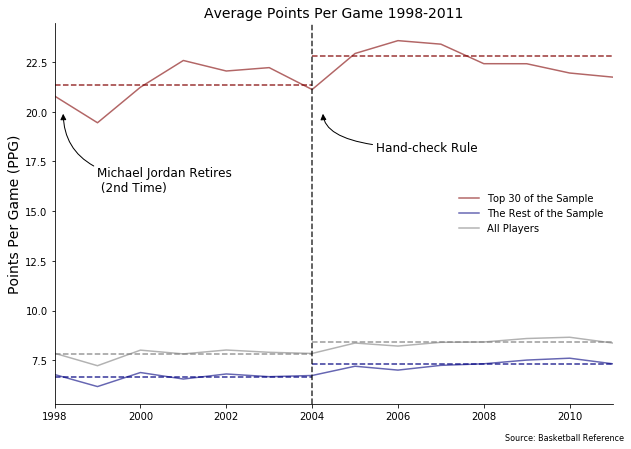

In [26]:
fig, ax = plt.subplots(figsize = (10,7))

rule_change = 2004
x_rule = (rule_change - start_date)/(end_date - start_date)

color = "maroon"
ax.plot(combo.Top_Average_PPG, color = color, alpha = 0.6, label = "Top 30 of the Sample")
ax.axhline(y = combo.Top_Average_PPG.loc[range(start_date, rule_change + 1)].mean(), xmax = x_rule, color = color,
          alpha = 0.8, linestyle = "--")
ax.axhline(y = combo.Top_Average_PPG.loc[range(rule_change + 1, end_date)].mean(), xmin = x_rule, color = color,
          alpha = 0.8, linestyle = "--")

color = "navy"
ax.plot(combo.Rest_Average_PPG, color = color, alpha = 0.6, label = "The Rest of the Sample")
ax.axhline(y = combo.Rest_Average_PPG.loc[range(start_date, rule_change + 1)].mean(), xmax = x_rule, color = color,
          alpha = 0.8, linestyle = "--")
ax.axhline(y = combo.Rest_Average_PPG.loc[range(rule_change + 1, end_date)].mean(), xmin = x_rule, color = color,
          alpha = 0.8, linestyle = "--")

color = "gray"
ax.plot(combo.All_Average_PPG, color = color, alpha = 0.6, label = "All Players")
ax.axhline(y = combo.All_Average_PPG.loc[range(start_date, rule_change + 1)].mean(), xmax = x_rule, color = color,
          alpha = 0.8, linestyle = "--")
ax.axhline(y = combo.All_Average_PPG.loc[range(rule_change + 1, end_date)].mean(), xmin = x_rule, color = color,
          alpha = 0.8, linestyle = "--")

ax.set_xlim(start_date,end_date)
ax.axvline(x = rule_change, color = "k", alpha = 0.8, linestyle = "--")

ax.legend(frameon = False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_title("Average Points Per Game 1998-2011", fontsize = 14)
ax.set_ylabel("Points Per Game (PPG)", fontsize = 14)

ax.annotate("Hand-check Rule",
        xy = (2004.25, 20),
        xytext = (2005.5, 18),
        xycoords = "data",
        arrowprops = {
        "arrowstyle": "-|>",
        "connectionstyle": "angle3,angleA=0,angleB=90",
        "color": "black"},
        fontsize = 12
           )

ax.annotate("Michael Jordan Retires \n (2nd Time)",
        xy = (1998.2, 20),
        xytext = (1999, 16),
        xycoords = "data",
        arrowprops = {
        "arrowstyle": "-|>",
        "connectionstyle": "angle3,angleA=0,angleB=90",
        "color": "black"},
        fontsize = 12
           )

ax.text(2008.5, 3.5, "Source: Basketball Reference", fontsize = 8)

plt.savefig("PPG.png", bbox_inches = "tight", dpi = 1800)

plt.show()

There is definitely after the hand-checking rule was implemented, as average scoring for all samples has increased after 2004.

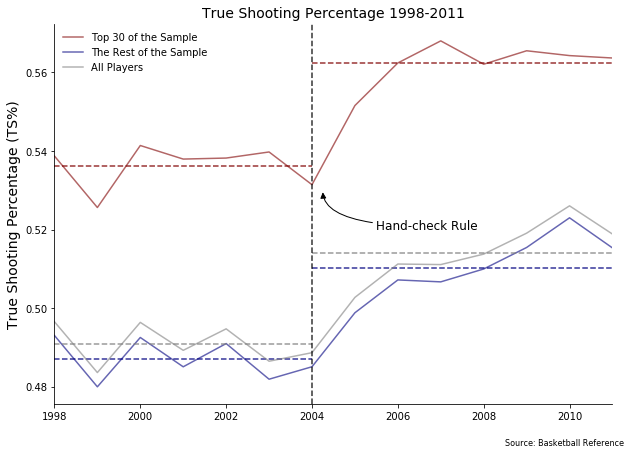

In [27]:
fig, ax = plt.subplots(figsize = (10,7))

rule_change = 2004
x_rule = (rule_change - start_date)/(end_date - start_date)

color = "maroon"
ax.plot(combo_TS.Top_TS, color = color, alpha = 0.6, label = "Top 30 of the Sample")
ax.axhline(y = combo_TS.Top_TS.loc[range(start_date, rule_change + 1)].mean(), xmax = x_rule, color = color,
          alpha = 0.8, linestyle = "--")
ax.axhline(y = combo_TS.Top_TS.loc[range(rule_change + 1, end_date)].mean(), xmin = x_rule, color = color,
          alpha = 0.8, linestyle = "--")

color = "navy"
ax.plot(combo_TS.Rest_TS, color = color, alpha = 0.6, label = "The Rest of the Sample")
ax.axhline(y = combo_TS.Rest_TS.loc[range(start_date, rule_change + 1)].mean(), xmax = x_rule, color = color,
          alpha = 0.8, linestyle = "--")
ax.axhline(y = combo_TS.Rest_TS.loc[range(rule_change + 1, end_date)].mean(), xmin = x_rule, color = color,
          alpha = 0.8, linestyle = "--")

color = "gray"
ax.plot(combo_TS.All_TS, color = color, alpha = 0.6, label = "All Players")
ax.axhline(y = combo_TS.All_TS.loc[range(start_date, rule_change + 1)].mean(), xmax = x_rule, color = color,
          alpha = 0.8, linestyle = "--")
ax.axhline(y = combo_TS.All_TS.loc[range(rule_change + 1, end_date)].mean(), xmin = x_rule, color = color,
          alpha = 0.8, linestyle = "--")

ax.set_xlim(start_date,end_date)
ax.axvline(x = rule_change, color = "k", alpha = 0.8, linestyle = "--")

ax.legend(frameon = False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_title("True Shooting Percentage 1998-2011", fontsize = 14)
ax.set_ylabel("True Shooting Percentage (TS%)", fontsize = 14)

ax.annotate("Hand-check Rule",
        xy = (2004.25, 0.53),
        xytext = (2005.5, 0.52),
        xycoords = "data",
        arrowprops = {
        "arrowstyle": "-|>",
        "connectionstyle": "angle3,angleA=0,angleB=90",
        "color": "black"},
        fontsize = 12
           )

ax.text(2008.5, 0.465, "Source: Basketball Reference", fontsize = 8)

plt.savefig("TS.png", bbox_inches = "tight", dpi = 1800)

plt.show()

Compared to the change in scoring, there was a drastic shift in true shooting percentage. Indeed, without defenders being able to hold down the opposing player, it is easier to convert attempts into points. As a result, TS% (a measure of effiency) has increased greatly.

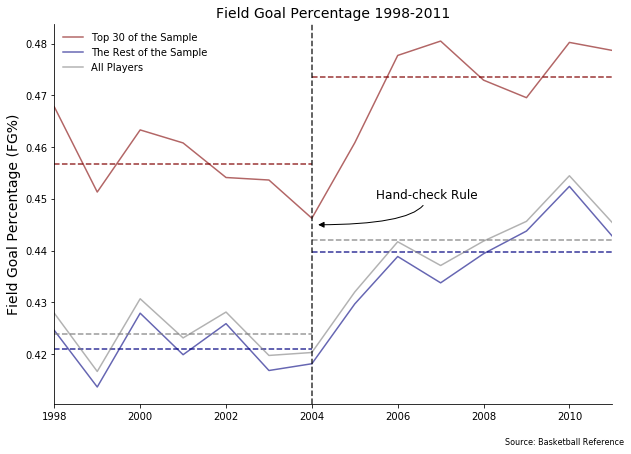

In [28]:
fig, ax = plt.subplots(figsize = (10,7))

rule_change = 2004
x_rule = (rule_change - start_date)/(end_date - start_date)

color = "maroon"
ax.plot(combo_FG.Top_FG, color = color, alpha = 0.6, label = "Top 30 of the Sample")
ax.axhline(y = combo_FG.Top_FG.loc[range(start_date, rule_change + 1)].mean(), xmax = x_rule, color = color,
          alpha = 0.8, linestyle = "--")
ax.axhline(y = combo_FG.Top_FG.loc[range(rule_change + 1, end_date)].mean(), xmin = x_rule, color = color,
          alpha = 0.8, linestyle = "--")

color = "navy"
ax.plot(combo_FG.Rest_FG, color = color, alpha = 0.6, label = "The Rest of the Sample")
ax.axhline(y = combo_FG.Rest_FG.loc[range(start_date, rule_change + 1)].mean(), xmax = x_rule, color = color,
          alpha = 0.8, linestyle = "--")
ax.axhline(y = combo_FG.Rest_FG.loc[range(rule_change + 1, end_date)].mean(), xmin = x_rule, color = color,
          alpha = 0.8, linestyle = "--")

color = "gray"
ax.plot(combo_FG.All_FG, color = color, alpha = 0.6, label = "All Players")
ax.axhline(y = combo_FG.All_FG.loc[range(start_date, rule_change + 1)].mean(), xmax = x_rule, color = color,
          alpha = 0.8, linestyle = "--")
ax.axhline(y = combo_FG.All_FG.loc[range(rule_change + 1, end_date)].mean(), xmin = x_rule, color = color,
          alpha = 0.8, linestyle = "--")

ax.set_xlim(start_date,end_date)
ax.axvline(x = rule_change, color = "k", alpha = 0.8, linestyle = "--")

ax.legend(frameon = False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_title("Field Goal Percentage 1998-2011", fontsize = 14)
ax.set_ylabel("Field Goal Percentage (FG%)", fontsize = 14)

ax.annotate("Hand-check Rule",
        xy = (2004.10, 0.445),
        xytext = (2005.5, 0.45),
        xycoords = "data",
        arrowprops = {
        "arrowstyle": "-|>",
        "connectionstyle": "angle3,angleA=90,angleB=0",
        "color": "black"},
        fontsize = 12
           )

ax.text(2008.5, 0.4025, "Source: Basketball Reference", fontsize = 8)

plt.savefig("FG.png", bbox_inches = "tight", dpi = 1800)

plt.show()

Similar to TS%, field goal percentage has also increased, showing the players have become more efficient at shooting the ball after the hand-checking rule was implemented.

In [29]:
#Take Kobe's Stats from our database above
kobe_df = season_df_2.set_index("Player").loc["Kobe Bryant"]
kobe_df = kobe_df.set_index("Year")

#Take Vince Carter's Stats from our database above
vince_df = season_df_2.set_index("Player").loc["Vince Carter"]

#Vince Carter played for two teams, we need to drop the duplicate values on the year he was traded
vince_df = vince_df.reset_index()

year_list = []
drop_list = []
for index, row in vince_df.iterrows():
    if row["Year"] not in year_list:
        year_list += [row["Year"]]
    else:
        drop_list += [index]
vince_df = vince_df.drop(drop_list, axis = 0)

vince_df = vince_df.set_index("Year")


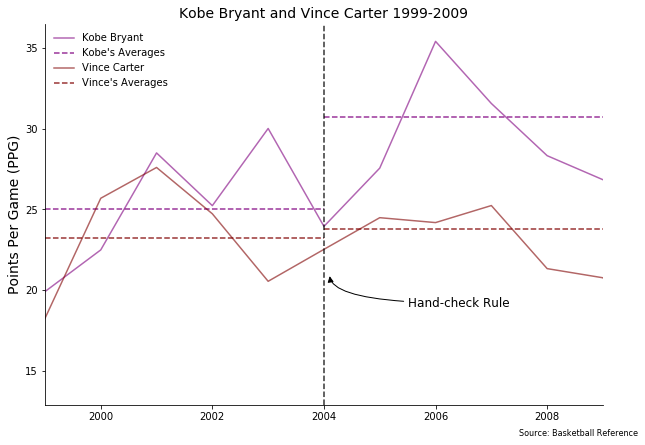

In [30]:
fig, ax = plt.subplots(figsize = (10,7))

start_date = 1999
end_date = 2009

rule_change = 2004
x_rule = (rule_change - start_date)/(end_date - start_date)

color = "purple"
ax.plot(kobe_df.PPG, color = color, alpha = 0.6, label = "Kobe Bryant")
ax.axhline(y = kobe_df.PPG.loc[range(start_date, rule_change + 1)].mean(), xmax = x_rule, color = color,
          alpha = 0.8, linestyle = "--", label = "Kobe's Averages")
ax.axhline(y = kobe_df.PPG.loc[range(rule_change + 1, end_date)].mean(), xmin = x_rule, color = color,
          alpha = 0.8, linestyle = "--")

color = "maroon"
ax.plot(vince_df.PPG, color = color, alpha = 0.6, label = "Vince Carter")
ax.axhline(y = vince_df.PPG.loc[range(start_date, rule_change + 1)].mean(), xmax = x_rule, color = color,
          alpha = 0.8, linestyle = "--", label = "Vince's Averages")
ax.axhline(y = vince_df.PPG.loc[range(rule_change + 1, end_date)].mean(), xmin = x_rule, color = color,
          alpha = 0.8, linestyle = "--")

ax.set_xlim(start_date,end_date)
ax.axvline(x = rule_change, color = "k", alpha = 0.8, linestyle = "--")

ax.legend(frameon = False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_title("Kobe Bryant and Vince Carter 1999-2009", fontsize = 14)
ax.set_ylabel("Points Per Game (PPG)", fontsize = 14)

ax.annotate("Hand-check Rule",
        xy = (2004.10, 21),
        xytext = (2005.5, 19),
        xycoords = "data",
        arrowprops = {
        "arrowstyle": "-|>",
        "connectionstyle": "angle3,angleA=0,angleB=90",
        "color": "black"},
        fontsize = 12
           )

ax.text(2007.5, 11, "Source: Basketball Reference", fontsize = 8)

plt.savefig("KobeVince.png", bbox_inches = "tight", dpi = 3600)

plt.show()

The same can be said for both Vince Carter and Kobe Bryant, the two players who received the most number of votes in the 2004 NBA All-Star game for the Eastern and Western conference respectively. Although Kobe's shift in points per game was much more aparent as this coincided with Shaq leaving the lakers, leaving Kobe as the number one option on the Lakers.